In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Preprocessing

## Factors Possibly Associated with Net Price

### Institutional Characteristics

In [3]:
filepath = "../datasets/IPEDS_Dataset_Encoded/Institutional Characteristics/IC_2015-2021_data.csv"
institutional_chars = pd.read_csv(filepath, index_col=0, low_memory= False)


In [4]:
missing = institutional_chars.isna().sum()
missing /= institutional_chars.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Percent Of Missing Values'})


In [5]:
institutional_chars.dropna(axis = 1, inplace = True)
institutional_chars.head()

,peo1istr,peo2istr,peo3istr,peo4istr,peo5istr,peo6istr,cntlaffi,pubprime,pubsecon,relaffil,...,assoc3,assoc4,assoc5,assoc6,sport1,confno1,sport2,sport3,sport4,year
unitid,,,,,,,,,,,,,,,,,,,,,
100654,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,Yes,Southwestern Athletic Conference,Yes,Yes,Yes,2021
100663,Implied no,Yes,Yes,Implied no,Implied no,Implied no,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,Yes,Conference USA,Yes,Yes,Yes,2021
100690,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,Private not-for-profit (religious affiliation),Not applicable,Not applicable,Churches of Christ,...,Implied no,Implied no,Implied no,Implied no,No,Not applicable,No,No,No,2021
100706,Implied no,Yes,Yes,Yes,Implied no,Implied no,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,No,Not applicable,Yes,Yes,Yes,2021
100724,Yes,Yes,Implied no,Implied no,Implied no,Yes,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,Yes,Southwestern Athletic Conference,Yes,Yes,Yes,2021


In [6]:
drop_columns = [c for c in institutional_chars.columns if institutional_chars[c].nunique() > 5]
pruned_institutional_chars = institutional_chars.drop(drop_columns, axis = 1)

In [7]:
pruned_institutional_chars.columns

Index(['peo1istr', 'peo2istr', 'peo3istr', 'peo4istr', 'peo5istr', 'peo6istr',
       'cntlaffi', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6',
       'level7', 'level8', 'level12', 'level17', 'level18', 'level19', 'ft_ug',
       'ft_ftug', 'ftgdnidp', 'pt_ug', 'pt_ftug', 'ptgdnidp', 'docpp',
       'docppsp', 'openadmp', 'vet1', 'vet2', 'vet3', 'vet4', 'vet5',
       'credits1', 'credits2', 'credits3', 'credits4', 'slo5', 'slo51',
       'slo52', 'slo53', 'slo6', 'slo7', 'slo8', 'slo81', 'slo82', 'slo83',
       'slo9', 'stusrv1', 'stusrv2', 'stusrv3', 'stusrv4', 'stusrv8',
       'stusrv9', 'tuitpl', 'tuitpl1', 'tuitpl2', 'tuitpl3', 'tuitpl4',
       'dstnced1', 'dstnced2', 'dstnced3', 'distnced', 'disab', 'alloncam',
       'tuitvary', 'room', 'board', 'athassoc', 'assoc1', 'assoc2', 'assoc3',
       'assoc4', 'assoc5', 'assoc6', 'sport1', 'sport2', 'sport3', 'sport4'],
      dtype='object')

In [16]:
from prince import MCA

mca = MCA(n_components = 10, n_iter = 3, random_state = 101)
mca.fit(pruned_institutional_chars)
inst_chars_mca = mca.transform(pruned_institutional_chars)
inst_chars_mca.head()


,0,1,2,3,4,5,6,7,8,9
100654,-0.064932,-0.324822,0.712717,0.680602,-0.196434,0.003036,-0.008160,-0.019827,0.071194,0.017372
100663,-0.066357,-0.332046,0.827903,0.970389,-0.088646,0.003289,-0.003929,0.417252,-0.040441,-0.266409
100690,-0.052886,-0.213908,0.398985,-0.228401,0.488422,-0.007134,0.037315,-0.029341,-0.364206,0.250035
100706,-0.066514,-0.320926,0.764592,0.809643,-0.146024,0.002182,-0.002377,0.400736,-0.077567,-0.179038
100724,-0.063264,-0.304502,0.695659,0.755640,-0.088632,0.003428,-0.009632,0.260147,0.049318,-0.106100


In [18]:
inst_chars_mca.index.name = "unitid"

In [19]:
mca.explained_inertia_

[0.21460633176110797,
 0.17793787049221904,
 0.15190074281822802,
 0.06512731481471334,
 0.04151032388001643,
 0.03429842357170866,
 0.02861280459094703,
 0.020338826089658483,
 0.013701464288571035,
 0.012901664950861454]

### Average Price

In [20]:
sfa_filepath =  "../datasets/IPEDS_Dataset_Encoded/Student Financial Aid/SFA_1415-2021_data.csv"
sfa_df = pd.read_csv(sfa_filepath, index_col = 0)

In [21]:
prices = sfa_df["npgrn0"].dropna(axis = 0)

In [36]:
avg_prices = prices.groupby(prices.index).mean()

In [37]:
merged_ic_price = pd.merge(inst_chars_mca, avg_prices, how = "left", on = "unitid")

/tmp/ipykernel_6340/1135607874.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

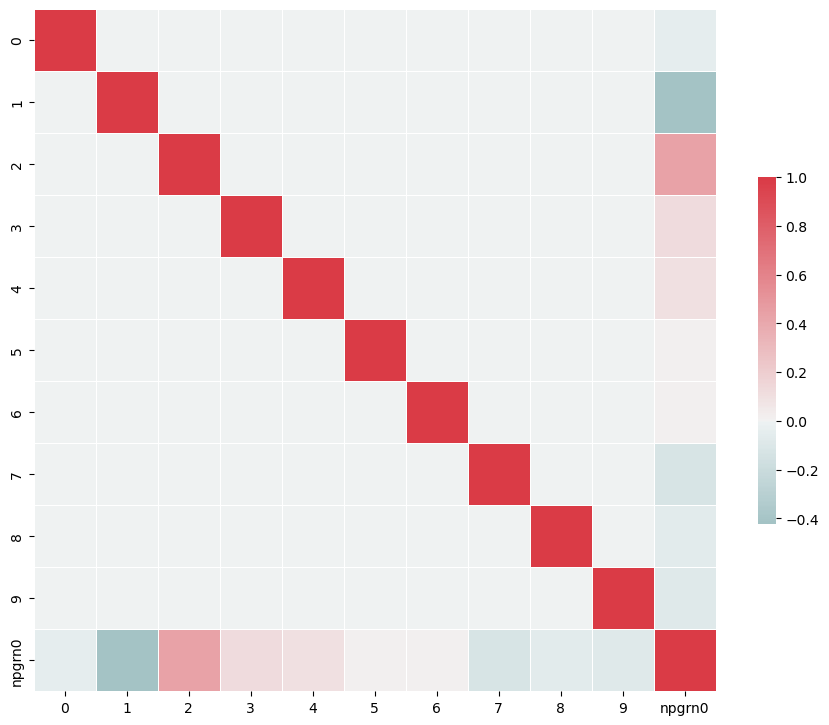

In [39]:
corr = merged_ic_price.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=None, vmax=1, center=0,
            square=True, linewidths=.5, cmap = cmap, cbar_kws={"shrink": .5})

### Random Forest Regression on Merged IC Price

In [40]:
merged_ic_price = merged_ic_price.dropna(axis = 0)

In [41]:
from sklearn.model_selection import train_test_split
X, y = merged_ic_price.iloc[:, :-1], merged_ic_price.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [46]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 200, max_depth = 50, random_state=0)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200, random_state=0)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"R^2: {r2_score(y_test, regr.predict(X_test))}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, regr.predict(X_test)))}")

R^2: 0.7125783537688747
RMSE: 4135.686498072553


In [48]:
y_test.std()

7714.559299951221

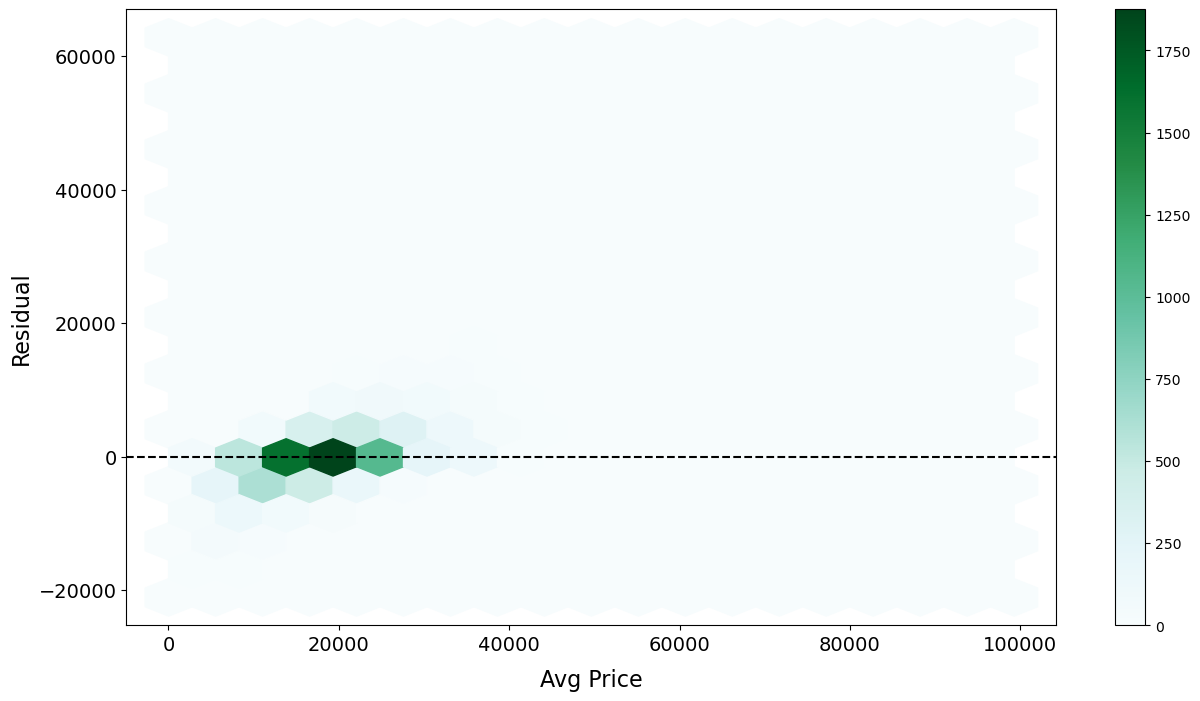

In [49]:
resid_df = pd.DataFrame({'Avg Price': y_test,
                   'Residual': y_test -  regr.predict(X_test)})
ax = resid_df.plot.hexbin(x='Avg Price', y='Residual', gridsize=18, figsize = (15, 8),sharex=False, fontsize = 14)
ax.set_xlabel("Avg Price", fontsize = 16, labelpad= 10)
ax.set_ylabel("Residual", fontsize = 16)
plt.axhline(y = 0, linestyle = "--", color = "k")

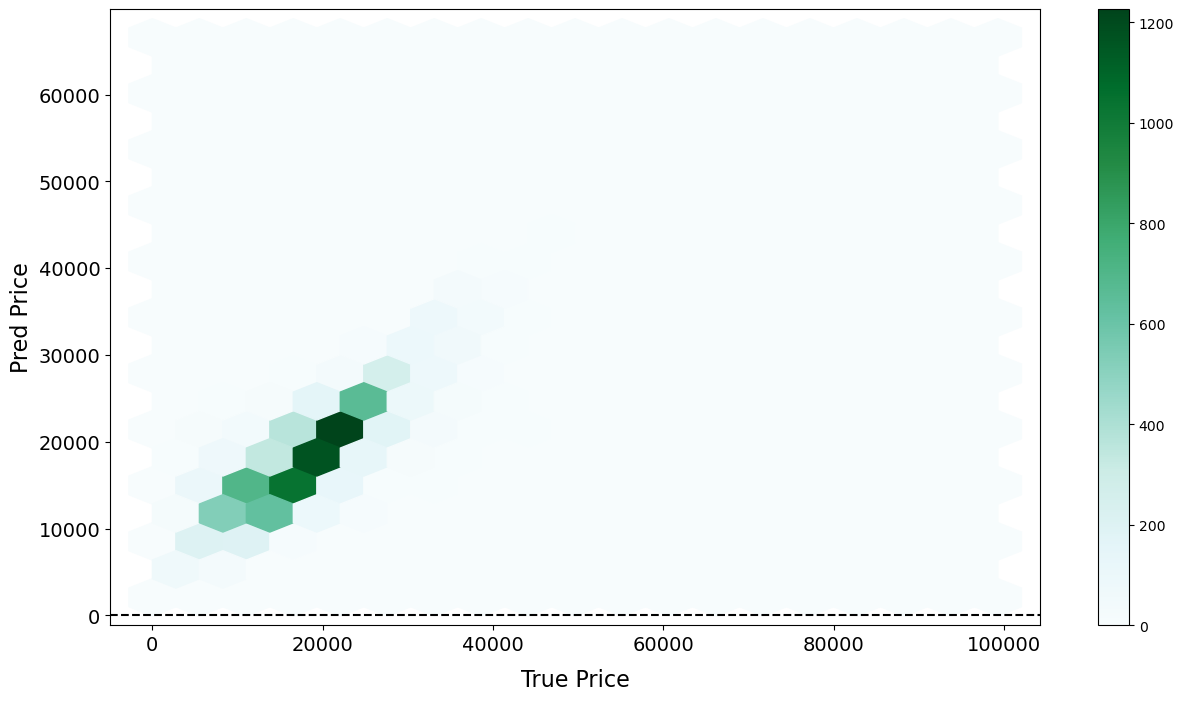

In [22]:
pred_df = pd.DataFrame({'True Price': y_test,
                   'Pred Price': regr.predict(X_test)})
ax = pred_df.plot.hexbin(x='True Price', y='Pred Price', gridsize=18, figsize = (15, 8),sharex=False, fontsize = 14)
ax.set_xlabel("True Price", fontsize = 16, labelpad= 10)
ax.set_ylabel("Pred Price", fontsize = 16)
plt.axhline(y = 0, linestyle = "--", color = "k")